In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pymc3 as pm
import os

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = pd.read_csv('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/booking_original.csv')

In [3]:
df.head(3)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled


In [8]:
# Perform random sampling of 10,000 observations
df1 = df.sample(n=500, random_state=123)  # Use a specific random_state for reproducibility

# Display the resulting DataFrame
print(df1)

      Booking_ID  number of adults  number of children  \
12627   INN12628                 2                   0   
36246   INN36247                 1                   0   
14778   INN14779                 2                   0   
24216   INN24217                 2                   2   
31524   INN31525                 2                   0   
...          ...               ...                 ...   
33868   INN33869                 2                   0   
18814   INN18815                 2                   2   
642     INN00643                 2                   0   
31079   INN31080                 2                   0   
31729   INN31730                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
12627                         1                      0   Meal Plan 1   
36246                         1                      1  Not Selected   
14778                         0                      4   Meal Plan 1   
24216          

In [9]:
df1.rename(columns={'Booking_ID':'Booking_ID','number of adults':'number_of_adults', 'number of children':'number_of_children',
                   'number of weekend nights':'number_of_weekend_nights', 'number of week nights':'number_of_week_nights',
                   'type of meal':'type_of_meal','car parking space':'car_parking_space', 'room type':'room_type',
                   'lead time':'lead_time', 'market segment type':'market_segment_type','number of adults':'number_of_adults', 'average price':'average_price','special requests':'special_requests', 
                  'date of reservation':'date_of_reservation','booking status':'booking_status'}, inplace=True)

In [10]:
df1.head(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
12627,INN12628,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,Complementary,0,0,0,0.00,0,8/3/2017,Not_Canceled
36246,INN36247,1,0,1,1,Not Selected,0,Room_Type 1,87,Online,0,0,0,111.60,1,4/30/2018,Canceled
14778,INN14779,2,0,0,4,Meal Plan 1,0,Room_Type 1,208,Online,0,0,0,75.44,0,12/29/2017,Canceled


In [11]:
df1.tail(3)

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
642,INN00643,2,0,2,1,Meal Plan 1,0,Room_Type 1,56,Online,0,0,0,109.8,0,8/28/2018,Canceled
31079,INN31080,2,0,1,3,Not Selected,0,Room_Type 1,72,Online,0,0,0,68.4,1,3/14/2018,Canceled
31729,INN31730,2,0,2,5,Meal Plan 1,0,Room_Type 1,64,Online,0,0,0,98.1,3,9/1/2018,Not_Canceled


In [12]:
df1.describe

<bound method NDFrame.describe of       Booking_ID  number_of_adults  number_of_children  \
12627   INN12628                 2                   0   
36246   INN36247                 1                   0   
14778   INN14779                 2                   0   
24216   INN24217                 2                   2   
31524   INN31525                 2                   0   
...          ...               ...                 ...   
33868   INN33869                 2                   0   
18814   INN18815                 2                   2   
642     INN00643                 2                   0   
31079   INN31080                 2                   0   
31729   INN31730                 2                   0   

       number_of_weekend_nights  number_of_week_nights  type_of_meal  \
12627                         1                      0   Meal Plan 1   
36246                         1                      1  Not Selected   
14778                         0                      

In [13]:
df1.shape

(500, 17)

In [14]:
df1.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [15]:
df1.isna().sum()

Booking_ID                  0
number_of_adults            0
number_of_children          0
number_of_weekend_nights    0
number_of_week_nights       0
type_of_meal                0
car_parking_space           0
room_type                   0
lead_time                   0
market_segment_type         0
repeated                    0
P-C                         0
P-not-C                     0
average_price               0
special_requests            0
date_of_reservation         0
booking_status              0
dtype: int64

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 12627 to 31729
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                500 non-null    object 
 1   number_of_adults          500 non-null    int64  
 2   number_of_children        500 non-null    int64  
 3   number_of_weekend_nights  500 non-null    int64  
 4   number_of_week_nights     500 non-null    int64  
 5   type_of_meal              500 non-null    object 
 6   car_parking_space         500 non-null    int64  
 7   room_type                 500 non-null    object 
 8   lead_time                 500 non-null    int64  
 9   market_segment_type       500 non-null    object 
 10  repeated                  500 non-null    int64  
 11  P-C                       500 non-null    int64  
 12  P-not-C                   500 non-null    int64  
 13  average_price             500 non-null    float64
 14  spec

In [17]:
df1['booking_status'].value_counts()
print(df1['booking_status'].value_counts())

Not_Canceled    365
Canceled        135
Name: booking_status, dtype: int64


In [18]:
df1 = df1.drop(['Booking_ID', 'date_of_reservation'], axis=1)

In [19]:
df1

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,booking_status
12627,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,Complementary,0,0,0,0.00,0,Not_Canceled
36246,1,0,1,1,Not Selected,0,Room_Type 1,87,Online,0,0,0,111.60,1,Canceled
14778,2,0,0,4,Meal Plan 1,0,Room_Type 1,208,Online,0,0,0,75.44,0,Canceled
24216,2,2,0,3,Meal Plan 1,0,Room_Type 2,43,Online,0,0,0,86.75,0,Canceled
31524,2,0,2,1,Meal Plan 2,0,Room_Type 1,138,Offline,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33868,2,0,0,1,Meal Plan 1,0,Room_Type 1,139,Online,0,0,0,72.25,1,Canceled
18814,2,2,2,1,Meal Plan 1,0,Room_Type 6,73,Online,0,0,0,159.30,0,Canceled
642,2,0,2,1,Meal Plan 1,0,Room_Type 1,56,Online,0,0,0,109.80,0,Canceled
31079,2,0,1,3,Not Selected,0,Room_Type 1,72,Online,0,0,0,68.40,1,Canceled


In [20]:
df1 = pd.get_dummies(df1, columns=['type_of_meal', 'room_type', 'market_segment_type'])

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 12627 to 31729
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_of_adults                   500 non-null    int64  
 1   number_of_children                 500 non-null    int64  
 2   number_of_weekend_nights           500 non-null    int64  
 3   number_of_week_nights              500 non-null    int64  
 4   car_parking_space                  500 non-null    int64  
 5   lead_time                          500 non-null    int64  
 6   repeated                           500 non-null    int64  
 7   P-C                                500 non-null    int64  
 8   P-not-C                            500 non-null    int64  
 9   average_price                      500 non-null    float64
 10  special_requests                   500 non-null    int64  
 11  booking_status                     500 non-null    o

In [22]:
feature_columns = ['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']
target_column = 'booking_status'

In [23]:
X = df1[feature_columns]
y = df1[target_column]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#X = df1.drop('booking_status', axis=1)  ######need later maybe
#y = df1['booking_status']

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ######need later maybe

In [27]:
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=123)

In [28]:
X_num = train_data.select_dtypes(include = ['int64', 'float64', 'datetime'])

In [29]:
path = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph'

In [30]:
os.mkdir(path)

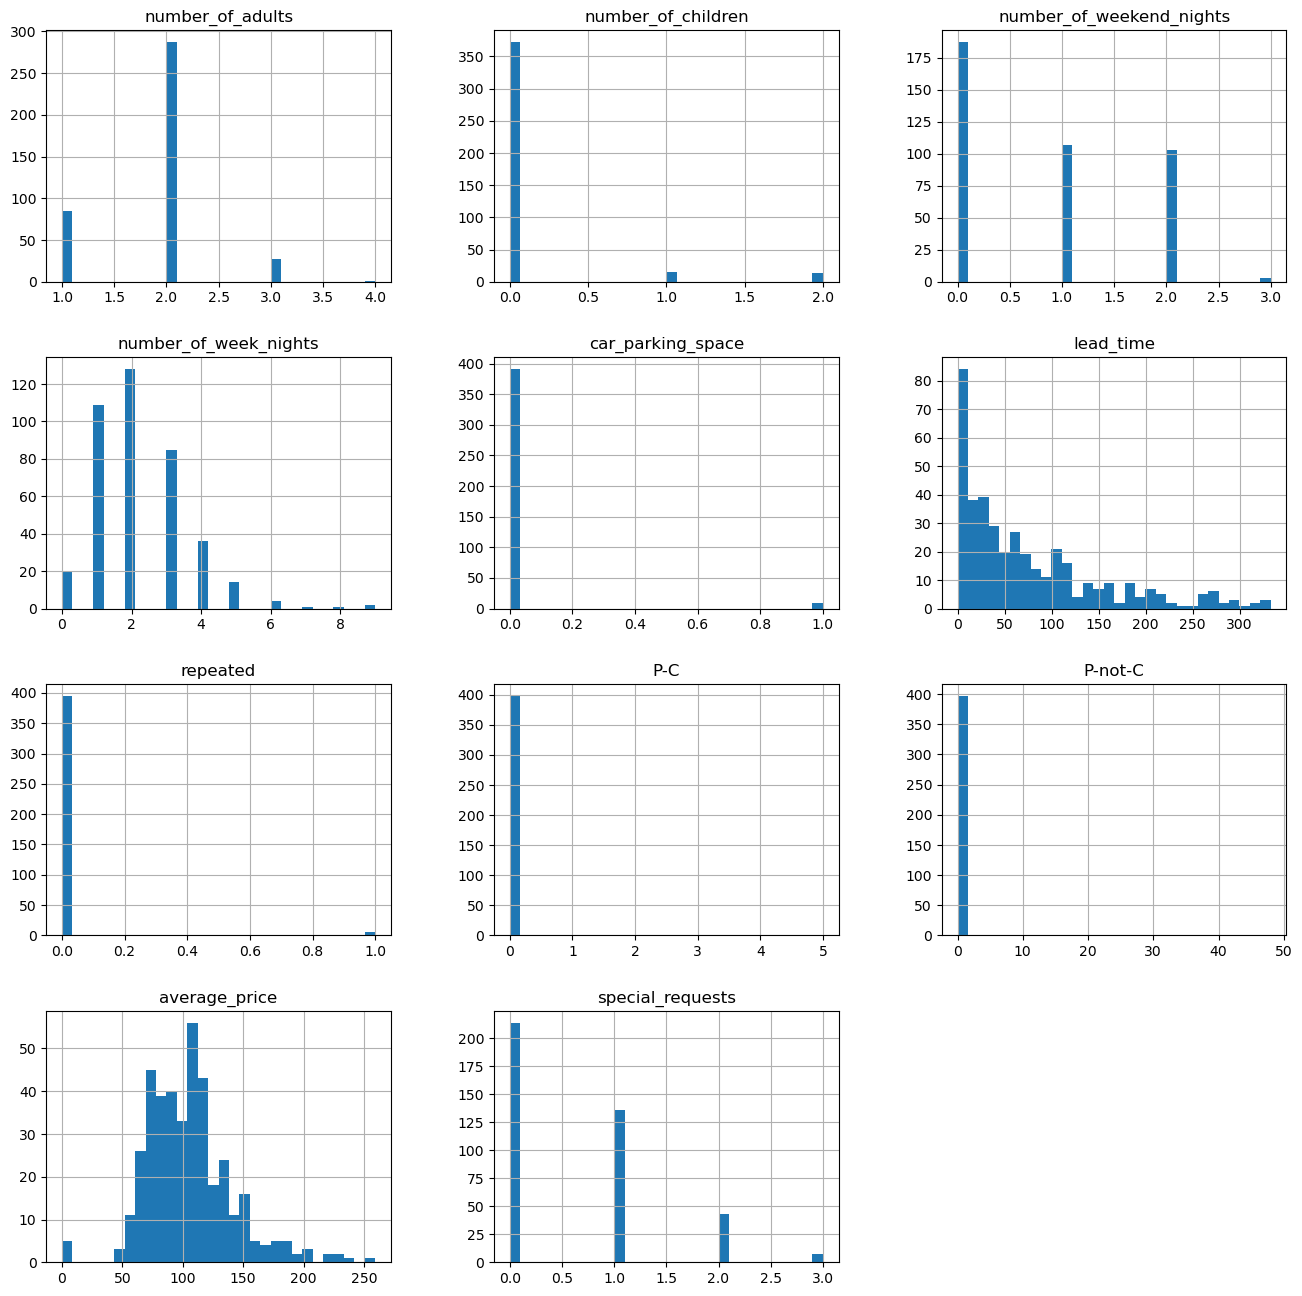

In [31]:
X_num.hist(bins = 30, figsize = (16, 16));
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/histogram_plot.png')
plt.show()

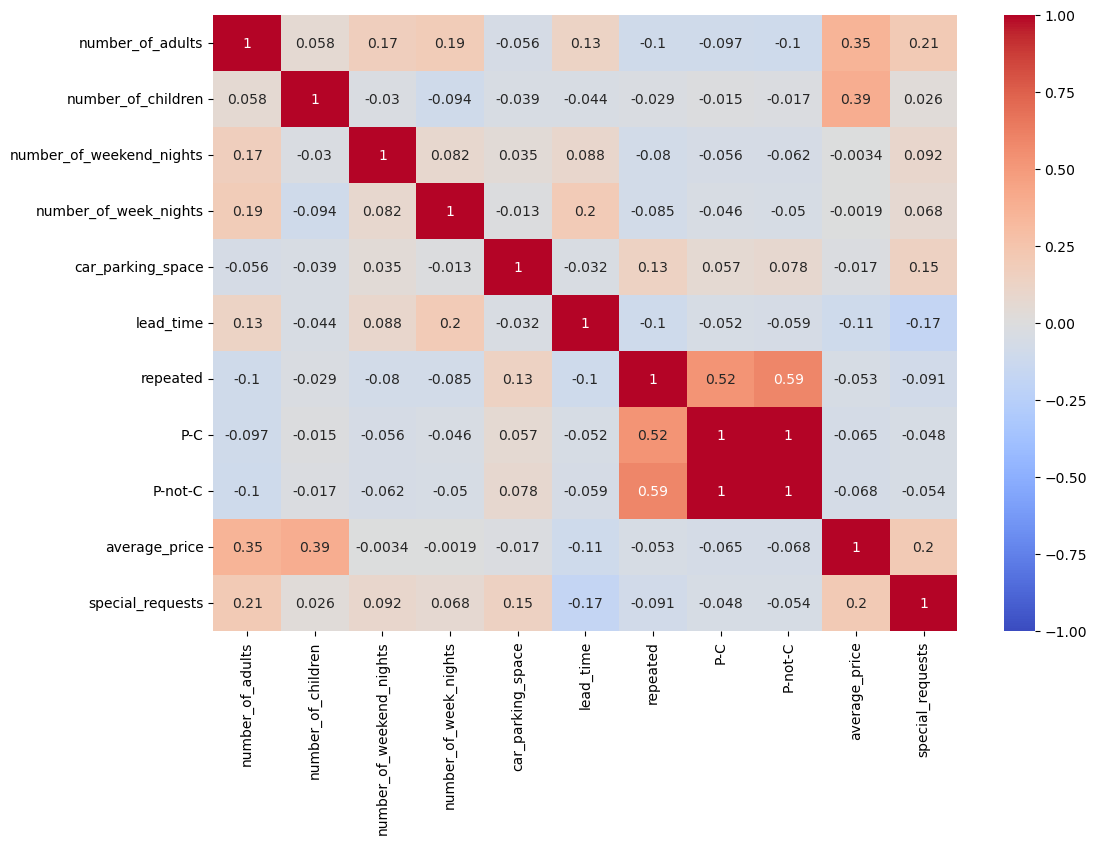

In [32]:
corr = pd.concat([X_num, (y_train == 'Canceled')], axis = 1).corr()
plt.figure(figsize = (12, 8))
sns.heatmap(corr, vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True);
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/correlation.png')

In [33]:
train_data.shape 

(400, 26)

In [34]:
test_data.shape  

(100, 26)

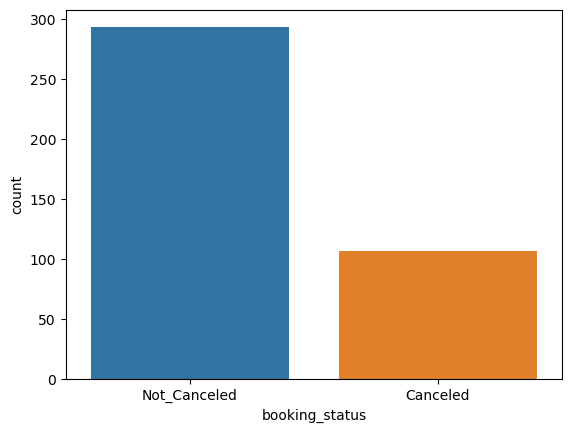

In [35]:
sns.countplot(x = y_train)
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/train_data.png')
plt.show()

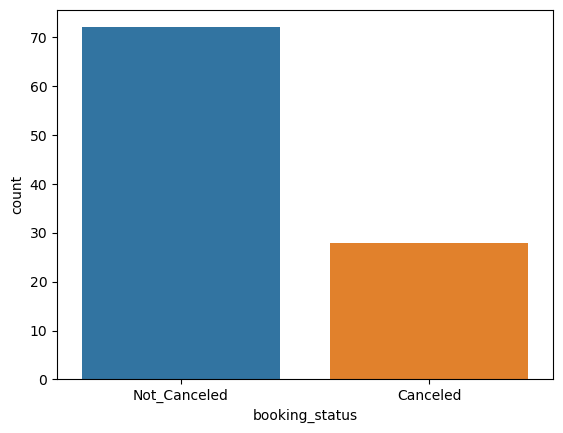

In [36]:
sns.countplot(x = y_test)
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/test_data.png')
plt.show()

In [37]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
print(feature_importances)

lead_time                   0.442112
average_price               0.257471
number_of_week_nights       0.089525
special_requests            0.077595
number_of_weekend_nights    0.060422
number_of_adults            0.052163
number_of_children          0.020711
dtype: float64


In [39]:
print(df1.columns)

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'car_parking_space', 'lead_time', 'repeated',
       'P-C', 'P-not-C', 'average_price', 'special_requests', 'booking_status',
       'type_of_meal_Meal Plan 1', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Not Selected', 'room_type_Room_Type 1',
       'room_type_Room_Type 2', 'room_type_Room_Type 4',
       'room_type_Room_Type 5', 'room_type_Room_Type 6',
       'room_type_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')


In [40]:
selected_columns_1 = ['lead_time', 'number_of_adults',
                     'number_of_children', 'number_of_weekend_nights',
                     'number_of_week_nights', 'special_requests',
                     'average_price', 'booking_status']
selected_df = df1[selected_columns_1]

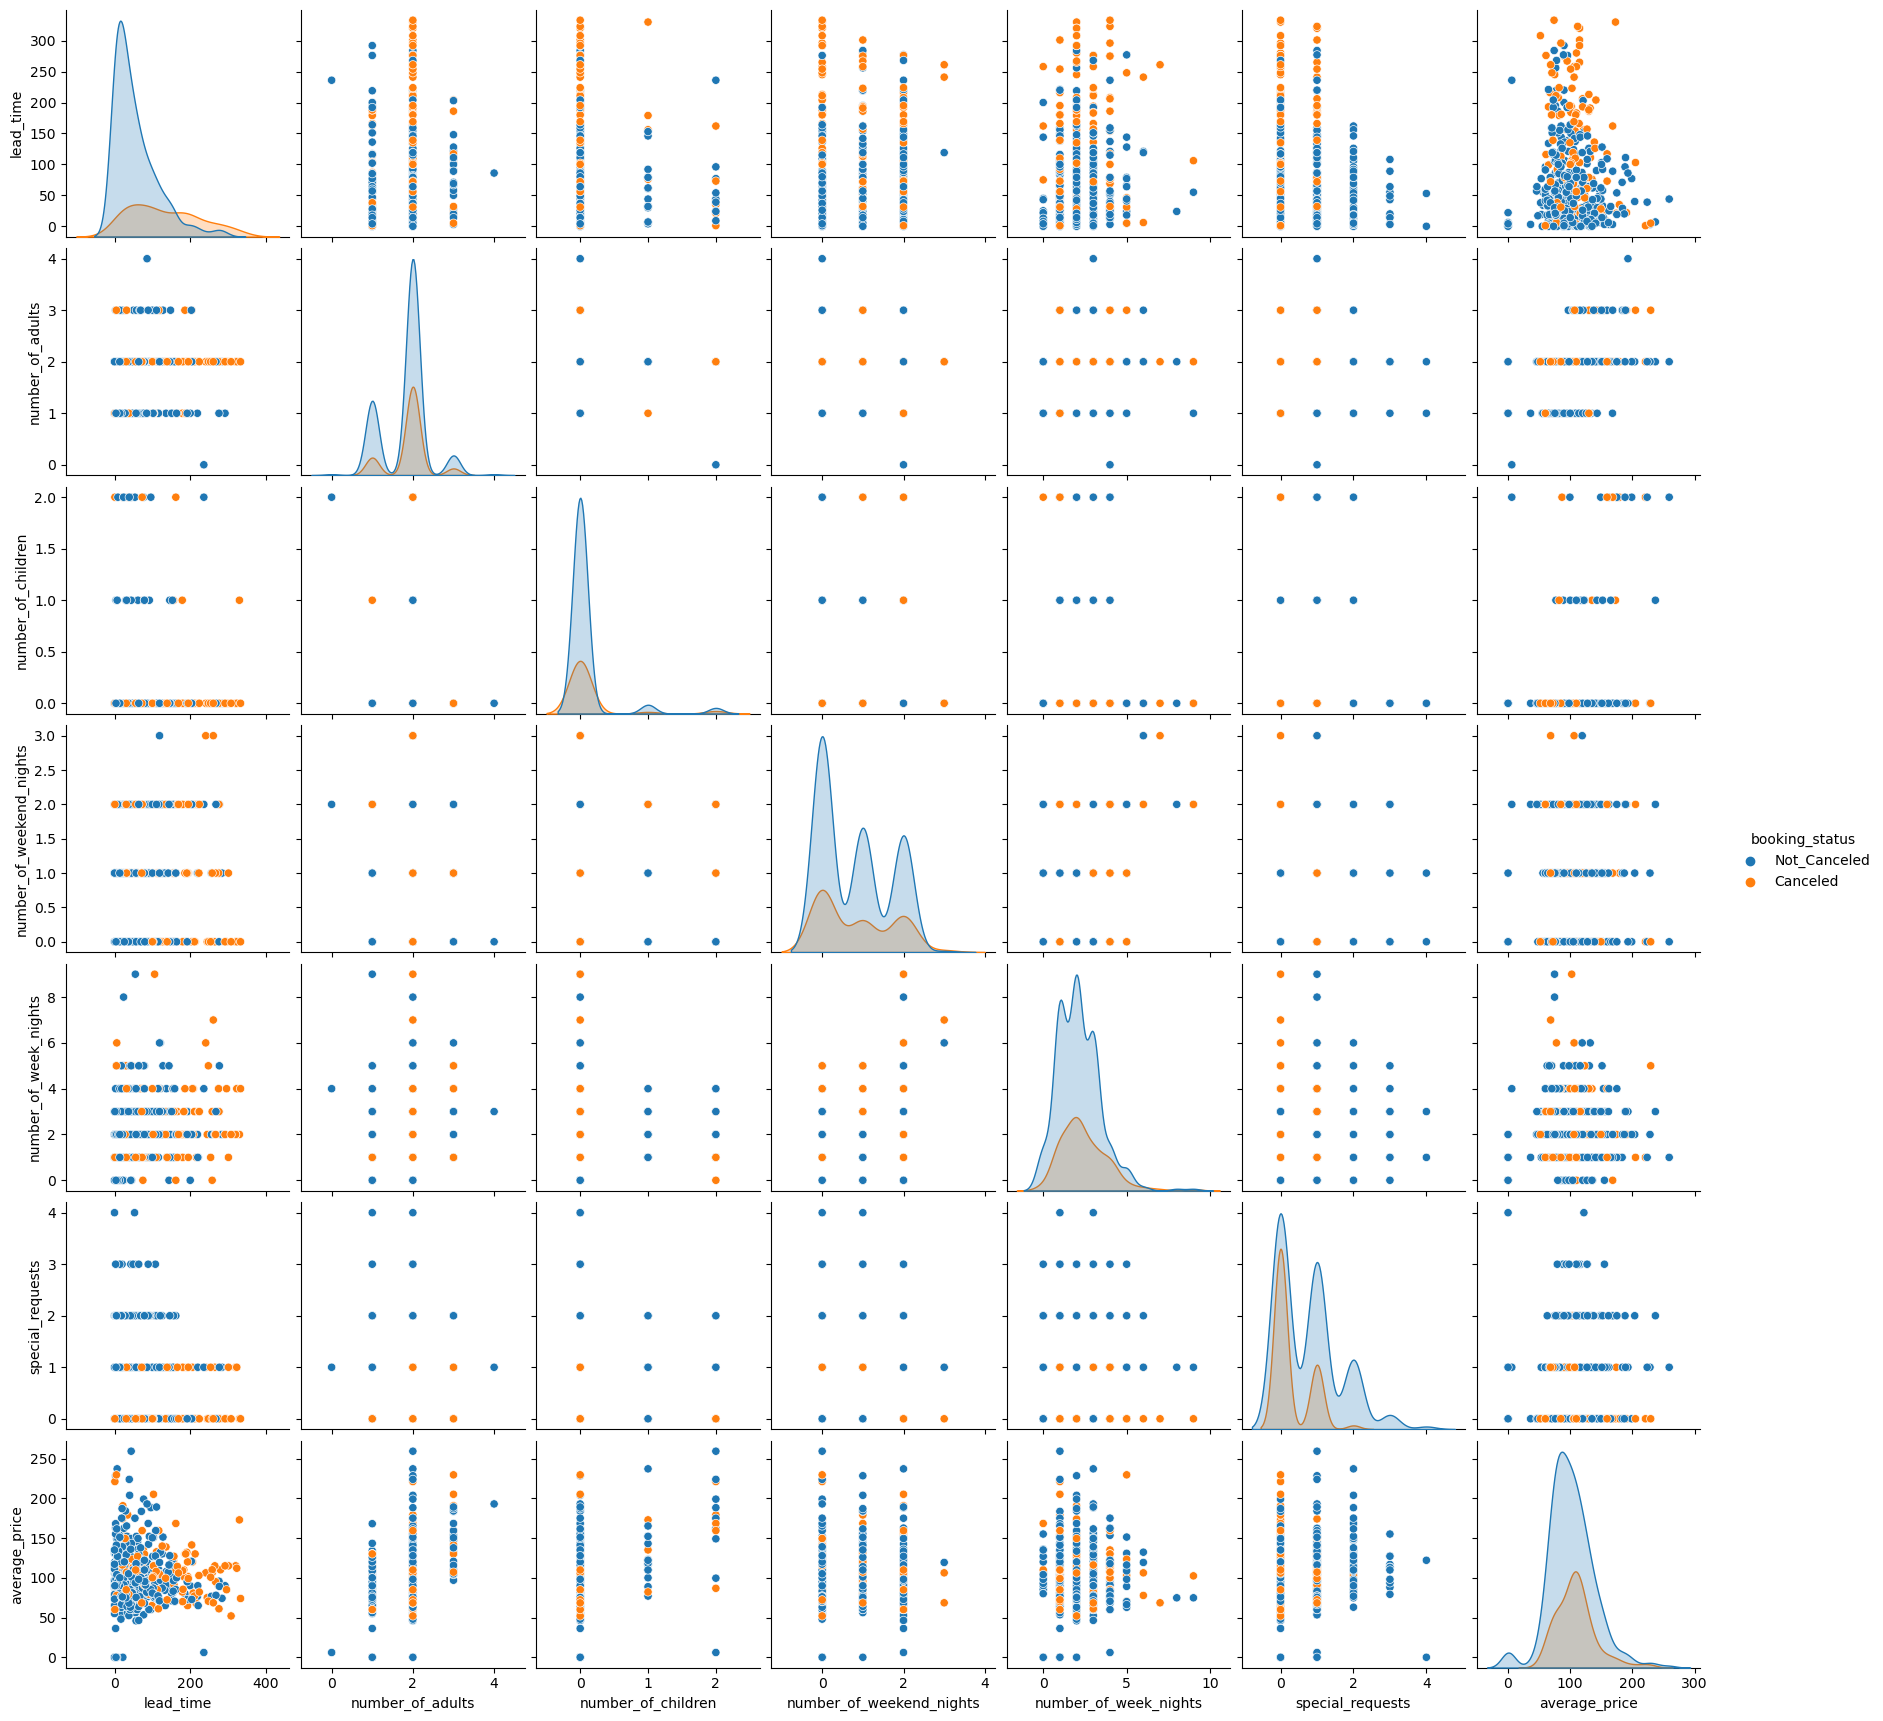

In [41]:
#Pairplot for selected variables
sns.pairplot(selected_df, hue='booking_status', diag_kind='kde')
plt.savefig('D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Graph/Pairplot_for_selected_variables.png')
plt.show()

Focused on: Predictive Booking Model: Implement a Bayesian model that predicts the likelihood of a successful booking based on variables such as lead time, number of adults and children, weekend and week nights, room type, and special requests. Use historical data to train the model and continuously update it to enhance accuracy.

GLM Implement -- Done

In [42]:
path1 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/GLM/'
os.mkdir(path1)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, average_price, special_requests

Sampling 4 chains for 25 tune and 100 draw iterations (100 + 400 draws total) took 2749 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9999980626032822, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9813743063968081, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9890993705704492, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.9740490268289156, but should be close to 0.8. Try to increase the number of tuning ste

                           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
Intercept                 0.150  0.856  -0.978    1.135      0.377    0.283   
lead_time                -0.050  0.160  -0.511    0.123      0.069    0.052   
number_of_adults          0.028  0.430  -0.931    0.471      0.187    0.141   
number_of_children       -0.163  0.348  -0.959    0.149      0.142    0.105   
number_of_weekend_nights  0.277  0.358  -0.027    0.939      0.137    0.106   
number_of_week_nights     0.141  0.412  -0.536    0.696      0.187    0.141   
special_requests          0.043  0.358  -0.279    0.791      0.157    0.121   
average_price            -0.007  0.096  -0.104    0.164      0.031    0.022   
sd                        0.815  0.710   0.362    2.637      0.321    0.249   

                          ess_bulk  ess_tail  r_hat  
Intercept                      6.0      12.0   1.87  
lead_time                      8.0      12.0   1.77  
number_of_adults               6.0      12.0   

C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


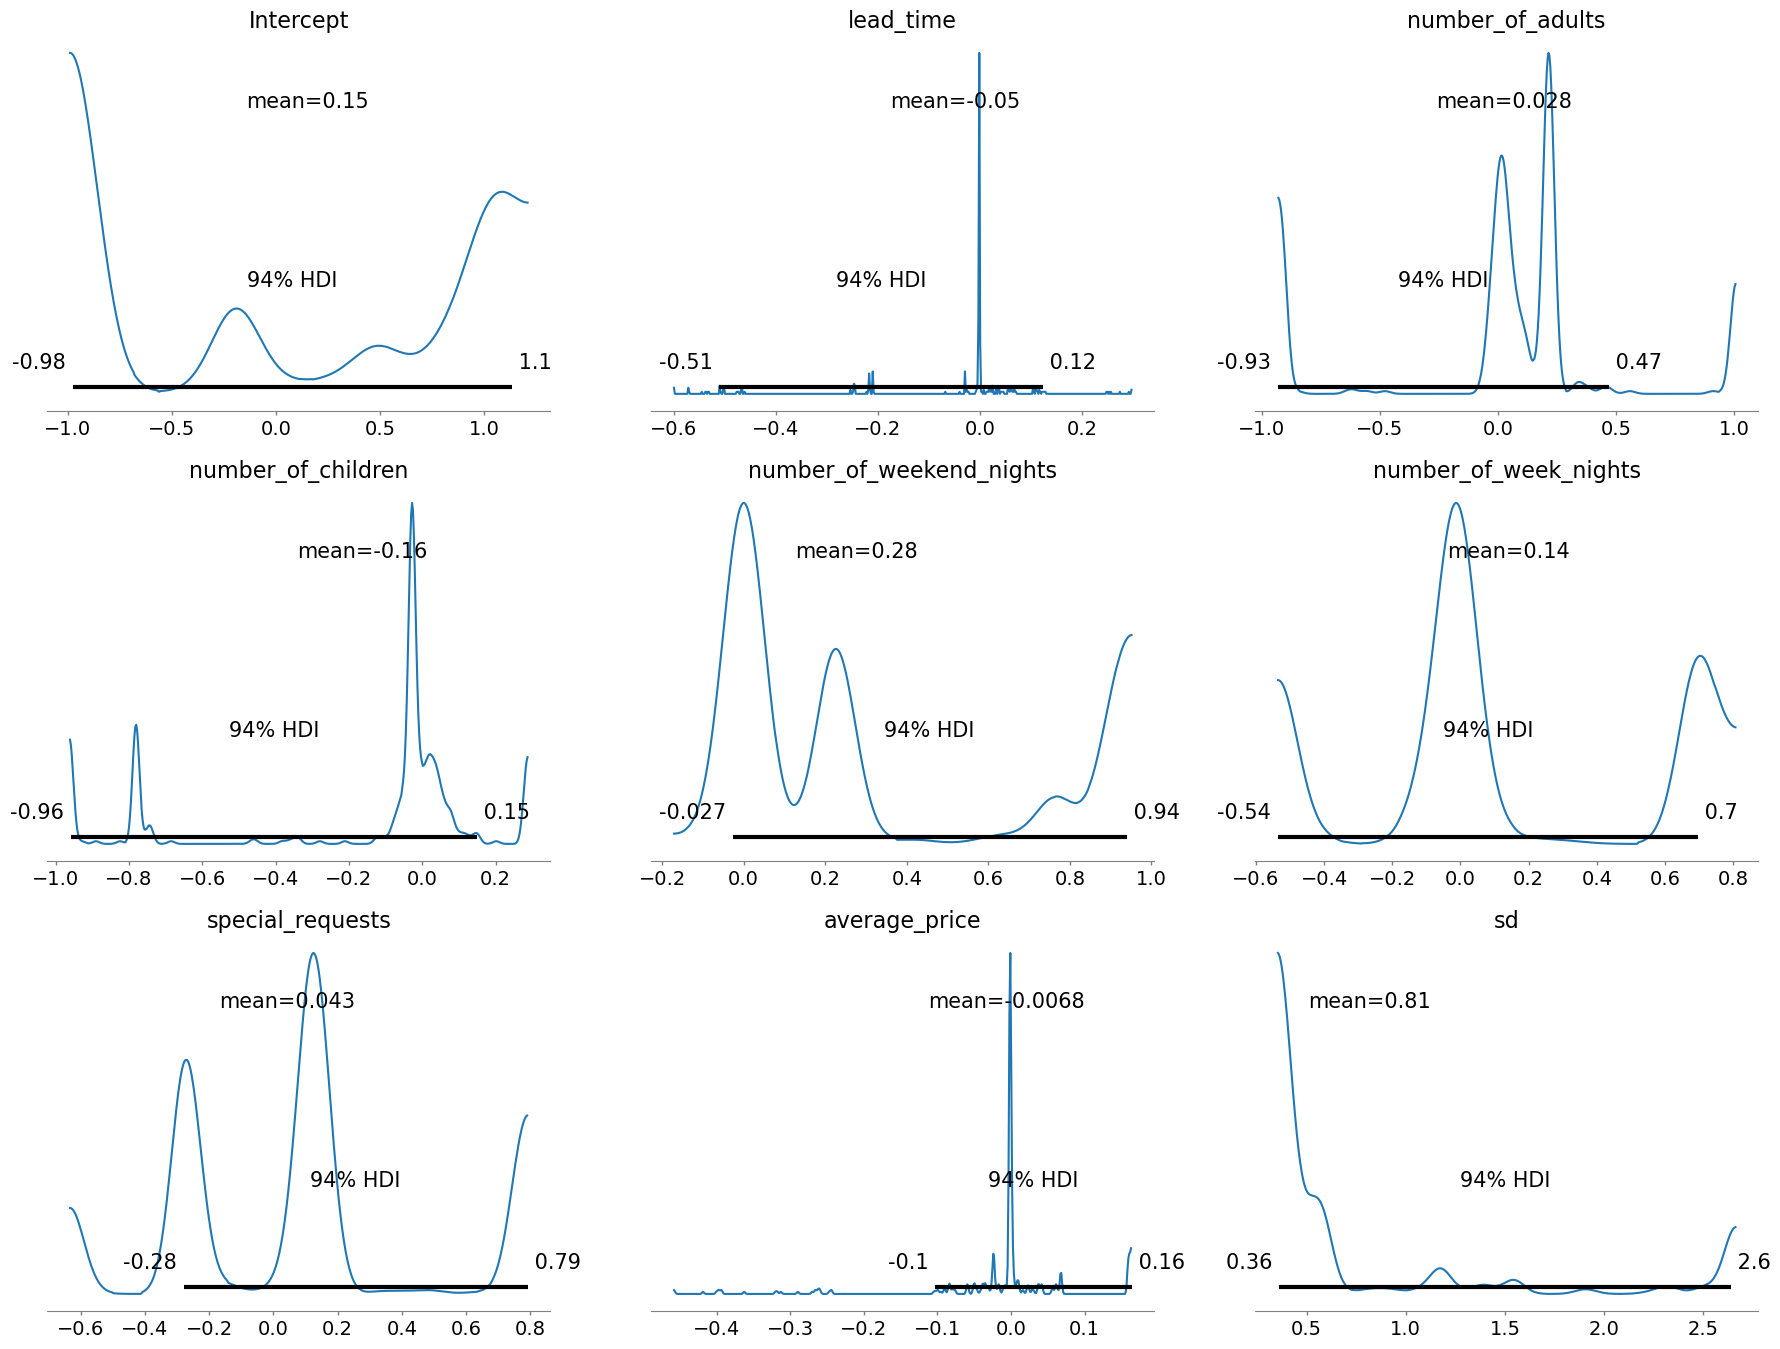

Done


In [43]:
with pm.Model() as bayesian_model:
    pm.glm.GLM.from_formula('booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price', df1)
    trace = pm.sample(100, tune=25)

 #Check the summary of the Bayesian model  #average_price is also important. so need to add next training.
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('./GLM/summary_GLM.png')
plt.show()
print('Done')

In [44]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [45]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [46]:
with bayesian_model:
    post_pred_train = pm.sample_posterior_predictive(trace, samples=400)

In [47]:
with bayesian_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=100)

C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [48]:
train_y_int_labels = train_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels_train = (post_pred_train['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels_train = predicted_labels_train[:len(train_y)]

# Calculate accuracy with integer labels for the training set
accuracy_train = accuracy_score(train_y_int_labels, predicted_labels_train)
print(f'Accuracy on training set: {accuracy_train}')

# Print classification report with integer labels for the training set
print(classification_report(train_y_int_labels, predicted_labels_train))


Accuracy on training set: 0.715
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       287
           1       0.00      0.00      0.00       113

    accuracy                           0.71       400
   macro avg       0.36      0.50      0.42       400
weighted avg       0.51      0.71      0.60       400



In [49]:
test_y_int_labels = test_y.map({'Canceled': 1, 'Not_Canceled': 0})
from sklearn.metrics import accuracy_score, classification_report

predicted_labels = (post_pred['y'].mean(axis=0) > 0.5).astype(int)
predicted_labels = predicted_labels[:len(test_y)]

# Calculate accuracy with integer labels
accuracy = accuracy_score(test_y_int_labels, predicted_labels)
print(f'Accuracy on test set: {accuracy}')

# Print classification report with integer labels
print(classification_report(test_y_int_labels, predicted_labels))

Accuracy on test set: 0.55
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        78
           1       0.17      0.27      0.21        22

    accuracy                           0.55       100
   macro avg       0.46      0.45      0.45       100
weighted avg       0.63      0.55      0.58       100



In [46]:
# List all variable names in the trace
print(trace.varnames)

['Intercept', 'lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price', 'sd_log__', 'sd']


Binomial-Beta Model

In [47]:
path2 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Binomial-Beta_Model/'
os.mkdir(path2)

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2851: RuntimeWarning: divide by zero encountered in true_divide
  return np.float32(1.0) / x
C:\Users\Jishan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in impl (vectorized)
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:3133: RuntimeWarning: overflow encountered in expm1
  return np.expm1(x)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:2893: RuntimeWarning: divide by zero encountered in log
  return np.log(x)


Sampling 2 chains for 2 tune and 10 draw iterations (4 + 20 draws total) took 3 seconds.
C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:659: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.8. Try to increase the number of tuning steps.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release.

    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.532  0.128   0.407    0.657      0.057    0.043       5.0       5.0   

   r_hat  
p    inf  
Probability that 'p' is greater than 0.5: 50.00%


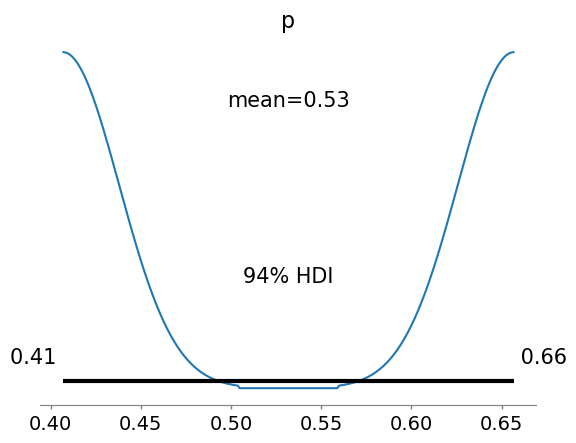

In [49]:
import pymc3 as pm
import pandas as pd
import arviz as az
from scipy.stats import percentileofscore

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as binomial_beta_model:
    # Prior for the probability parameter (Beta distribution)
    p = pm.Beta('p', alpha=2, beta=2)
    
    # Likelihood (Binomial distribution)
    likelihood = pm.Binomial('likelihood', n=len(df1['booking_status']), p=p, observed=df1['booking_status'])
    

    trace = pm.sample(10, tune=2, cores=1)  # Adjust the number of samples and tuning steps as needed


print(pm.summary(trace))


az.plot_posterior(trace, var_names=['p'])
plt.savefig('./Binomial-Beta_Model/posterior_plot.png')

# Hypothesis testing

threshold = 0.5
posterior_prob_greater_than_threshold = percentileofscore(trace['p'], threshold)
print(f"Probability that 'p' is greater than {threshold}: {100 - posterior_prob_greater_than_threshold:.2f}%")

In [50]:
train_X = train_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
train_y = train_data['booking_status']

In [51]:
test_X = test_data[['lead_time', 'number_of_adults', 'number_of_children', 'number_of_weekend_nights', 'number_of_week_nights', 'special_requests', 'average_price']]
test_y = test_data['booking_status']

In [52]:
with binomial_beta_model:
    # Sample from the posterior predictive distribution
    post_pred_train = pm.sample_posterior_predictive(trace, samples=300)


In [53]:
# Assuming you have the trained model from the previous step
with binomial_beta_model:
    post_pred = pm.sample_posterior_predictive(trace, samples=300)

In [54]:
import numpy as np
from scipy.stats import beta
from sklearn.metrics import accuracy_score, classification_report

# Define some_scaling_factor appropriately
some_scaling_factor = 1.0  # Adjust this based on your model's requirements

# Using 'likelihood' instead of 'y'
predicted_probs = post_pred_train['likelihood'].mean(axis=0)

# Ensure predicted_probs are within (0, 1)
epsilon = 1e-6  # Small value to prevent 0 or 1
predicted_probs = np.clip(predicted_probs, epsilon, 1 - epsilon)

alpha_train = predicted_probs * some_scaling_factor
beta_train = (1 - predicted_probs) * some_scaling_factor

# Ensure all values in alpha_train and beta_train are positive
if np.any(alpha_train <= 0) or np.any(beta_train <= 0):
    raise ValueError("Non-positive values found in alpha_train or beta_train.")

# Sample from the Beta distribution for the training set
sampled_labels_train = np.random.beta(alpha_train[:len(train_y_int_labels)], beta_train[:len(train_y_int_labels)])

# Convert probabilities to binary labels for the training set
predicted_labels_beta_train = (sampled_labels_train > 0.5).astype(int)

# Calculate accuracy with binary labels for the training set
accuracy_train_beta = accuracy_score(train_y_int_labels, predicted_labels_beta_train)
print(f'Accuracy on training set (Binomial-Beta Model): {accuracy_train_beta}')
print(classification_report(train_y_int_labels, predicted_labels_beta_train))

Accuracy on training set (Binomial-Beta Model): 0.329125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5367
           1       0.33      1.00      0.50      2633

    accuracy                           0.33      8000
   macro avg       0.16      0.50      0.25      8000
weighted avg       0.11      0.33      0.16      8000



C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(f"Length of train_y_int_labels: {len(train_y_int_labels)}")
print(f"Length of predicted_labels_beta_train: {len(predicted_labels_beta_train)}")

Length of train_y_int_labels: 8000
Length of predicted_labels_beta_train: 8000


In [56]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report


some_scaling_factor = 1.0  # Adjust this based on your model's requirements

predicted_probabilities = post_pred['likelihood'].mean(axis=0)

predicted_probabilities = predicted_probabilities[:len(test_y)]

# Ensure predicted_probabilities are within (0, 1)
epsilon = 1e-6  # Small value to prevent 0 or 1
predicted_probabilities = np.clip(predicted_probabilities, epsilon, 1 - epsilon)

alpha = predicted_probabilities * some_scaling_factor
beta_value = (1 - predicted_probabilities) * some_scaling_factor

# Check if alpha and beta_value are valid (all values should be > 0)
if np.any(alpha <= 0) or np.any(beta_value <= 0):
    raise ValueError("Invalid values in alpha or beta_value. Adjust some_scaling_factor or predicted_probabilities.")

# Sample from the Beta distribution for the test set
sampled_labels = np.random.beta(alpha, beta_value, size=len(test_y))

# Convert probabilities to binary labels for the test set
predicted_labels_beta = (sampled_labels > 0.5).astype(int)


accuracy_beta = accuracy_score(test_y_int_labels, predicted_labels_beta)
print(f'Accuracy on test set (Binomial-Beta Model): {accuracy_beta}')

print(classification_report(test_y_int_labels, predicted_labels_beta))

Accuracy on test set (Binomial-Beta Model): 0.3335
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1333
           1       0.33      1.00      0.50       667

    accuracy                           0.33      2000
   macro avg       0.17      0.50      0.25      2000
weighted avg       0.11      0.33      0.17      2000



C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jishan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Poisson-Gamma Model

In [49]:
path3 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Poisson_Gamma_Model/'
os.mkdir(path3)

In [51]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df1 with the required columns

with pm.Model() as poisson_gamma_model:
    pm.glm.GLM.from_formula(
        'booking_status ~ lead_time + number_of_adults + number_of_children + number_of_weekend_nights + number_of_week_nights + special_requests + average_price',
        df1,
        family=pm.glm.families.Poisson(link=pm.glm.families.links.log)
    )
    trace = pm.sample(10, tune=2)

# Check the summary of the Bayesian model
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('./Poisson_Gamma_Model/summary_Poisson_Gamma.png')
plt.show()
print('Done')


AttributeError: module 'pymc3.glm.families' has no attribute 'links'

In [59]:
with bayesian_model:
    post_pred_test = pm.sample_posterior_predictive(trace, samples=5)

# Convert Poisson counts to binary labels for the test set
predicted_labels_test = (post_pred_test['likelihood'].mean(axis=0) > 0.5).astype(int)

# Ensure the size of predicted_labels_test matches the size of the test set
predicted_labels_test = predicted_labels_test[:len(test_data)]

actual_labels_test = (test_data['booking_status'] == 'Canceled').astype(int)

# Check the lengths
print(f"Length of actual_labels_test: {len(actual_labels_test)}")
print(f"Length of predicted_labels_test: {len(predicted_labels_test)}")

# Ensure both arrays have the same length
if len(actual_labels_test) != len(predicted_labels_test):
    raise ValueError("The number of actual and predicted labels do not match.")

# Calculate accuracy with binary labels for the test set
accuracy_test = accuracy_score(actual_labels_test, predicted_labels_test)
print(f'Accuracy on test set: {accuracy_test}')

# Print classification report with binary labels for the test set
print(classification_report(actual_labels_test, predicted_labels_test))


C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Length of actual_labels_test: 2000
Length of predicted_labels_test: 2000
Accuracy on test set: 0.509
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      1333
           1       0.36      0.58      0.44       667

    accuracy                           0.51      2000
   macro avg       0.52      0.53      0.50      2000
weighted avg       0.58      0.51      0.52      2000



Exponential-Gamma Model

In [60]:
path4 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/Exponential-Gamma_Model/'
os.mkdir(path4)

C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [rate]


C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: overflow encountered in exp
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\scalar\basic.py:1813: RuntimeWarning: invalid value encountered in double_scalars
  return sum(inputs)


Sampling 2 chains for 800 tune and 1_000 draw iterations (1_600 + 2_000 draws total) took 7 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


         mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
rate  5000.35  50.645  4896.742  5088.487      1.692    1.197     899.0   

      ess_tail  r_hat  
rate    1274.0    1.0  


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


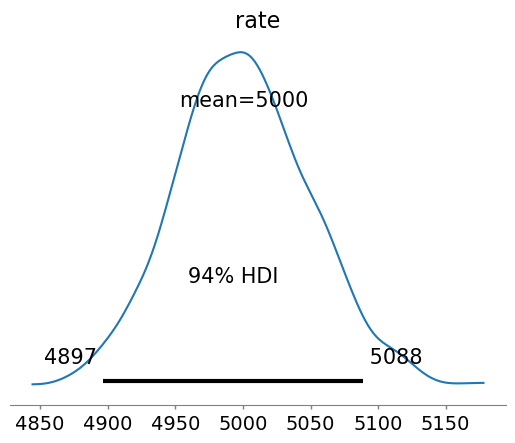

In [61]:
import pymc3 as pm
import pandas as pd
import arviz as az

# Assuming df is your DataFrame

# Encode 'booking_status' into binary format
df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

with pm.Model() as bayesian_model:
    # Prior for the rate parameter (Gamma distribution)
    rate = pm.Gamma('rate', alpha=2, beta=2)
    
    # Exponential likelihood
    likelihood = pm.Exponential('likelihood', lam=rate, observed=df1['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(1000, tune=800, cores=1)  # Adjust the number of samples and tuning steps as needed

# Check the summary of the Bayesian model
print(pm.summary(trace))

# Plot posterior distribution
az.plot_posterior(trace, var_names=['rate'])
plt.savefig('./Exponential-Gamma_Model/Exponential-Gamma_Model.png')

C:\Users\Jishan\anaconda3\lib\site-packages\pymc3\sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


Got error No model on context stack. trying to find log_likelihood in translation.
posterior predictive variable likelihood's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
posterior predictive variable test_likelihood's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.
C:\Users\Jishan\anaconda3\lib\site-packages\xarray\core\utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(
C:\Users\Jishan\anaconda3\lib\site-packages\arviz\stats\density_utils.py:491: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


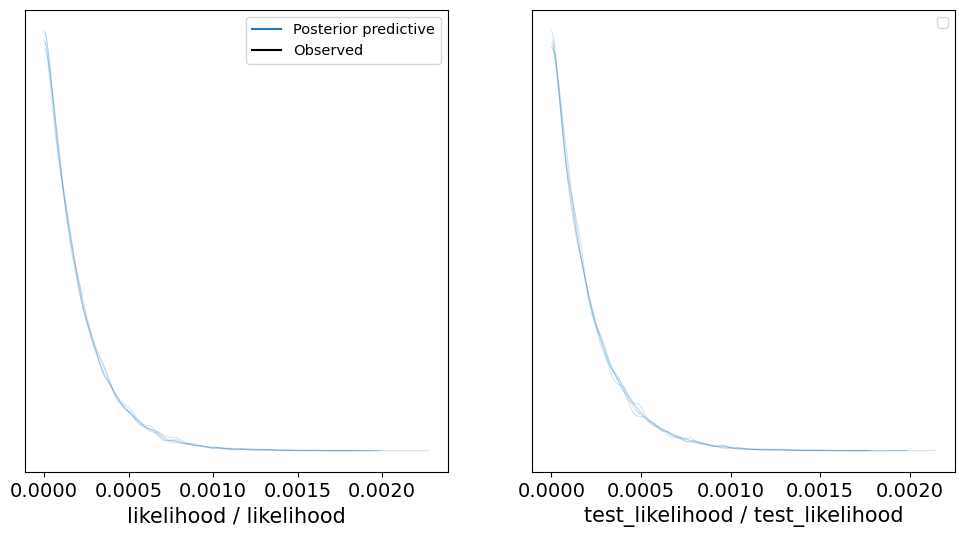

In [62]:
import pymc3 as pm
import arviz as az
import numpy as np
import theano.tensor as tt

df1['booking_status'] = (df1['booking_status'] == 'Canceled').astype(int)

# Calculate the mean outside the model context
rate_posterior_mean = trace['rate'].mean(axis=0)

# Make predictions on the test data using the trained model
with bayesian_model:
    # Create a deterministic variable using the computed mean
    rate_posterior = pm.Deterministic('rate_posterior', tt.as_tensor_variable(rate_posterior_mean))

    # Exponential likelihood for the test data
    test_likelihood = pm.Exponential('test_likelihood', lam=rate_posterior, observed=df1['booking_status'])

    # Sample from the posterior distribution for the test likelihood
    test_trace = pm.sample_posterior_predictive(trace, samples=5)

az.plot_ppc(az.from_pymc3(trace, posterior_predictive=test_trace), figsize=(12, 6), mean=False)
plt.savefig('./Exponential-Gamma_Model/gr1.png')

Bayesian logistic regression model

In [50]:
path5 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/LogisticRegression/'
os.mkdir(path5)

C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b7, b6, b5, b4, b3, b2, b1, b0]


Sampling 4 chains for 25 tune and 100 draw iterations (100 + 400 draws total) took 10746 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6514489026200853, but should be close to 0.8. Try to increase the number of tuning steps.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9400414492509722, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The number of effective samples is smaller than 10% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translat

     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
b0  0.944  1.576  -0.412    3.798      0.737    0.558       5.0      25.0   
b1 -0.423  0.413  -0.898   -0.008      0.198    0.151       5.0      12.0   
b2  0.047  0.695  -0.992    0.963      0.327    0.252       5.0      13.0   
b3  0.011  0.586  -0.888    0.680      0.270    0.206       5.0      12.0   
b4 -0.109  0.214  -0.408    0.153      0.098    0.077       5.0      33.0   
b5  0.200  0.256  -0.182    0.661      0.121    0.092       5.0      18.0   
b6  0.555  0.510  -0.174    1.285      0.240    0.182       5.0      12.0   
b7  0.429  0.427  -0.020    0.868      0.205    0.156       5.0      25.0   

    r_hat  
b0   2.97  
b1   3.04  
b2   3.33  
b3   2.63  
b4   2.41  
b5   2.87  
b6   2.86  
b7   2.90  


C:\Users\Jishan\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


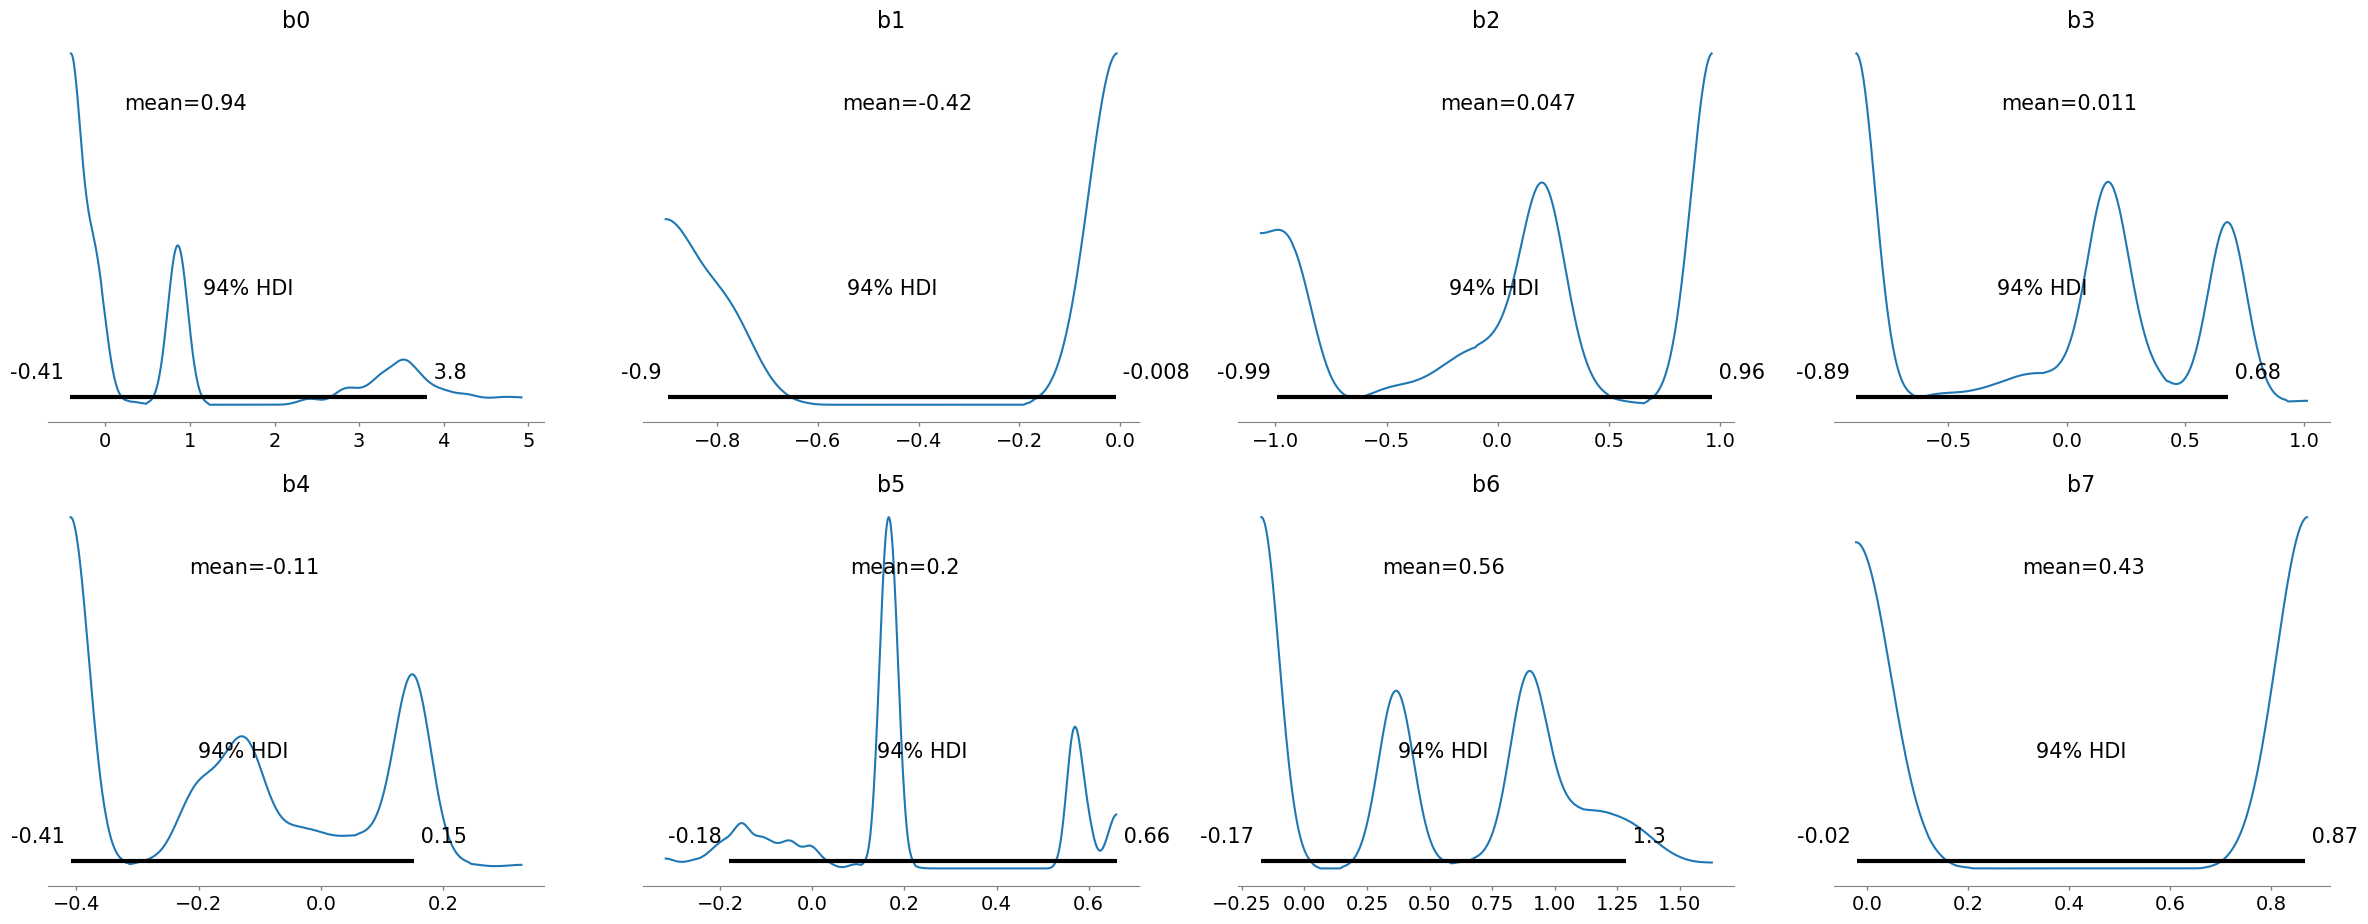

Done


In [51]:
import pymc3 as pm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df1 contains your data
label_encoder = LabelEncoder()
df1['booking_status'] = label_encoder.fit_transform(df1['booking_status'])

with pm.Model() as bayesian_model:
    # Define priors for the coefficients
    b0 = pm.Normal('b0', mu=0, sd=10)  # Intercept
    b1 = pm.Normal('b1', mu=0, sd=10)  # Coefficient for lead_time
    b2 = pm.Normal('b2', mu=0, sd=10)  # Coefficient for number_of_adults
    b3 = pm.Normal('b3', mu=0, sd=10)  # Coefficient for number_of_children
    b4 = pm.Normal('b4', mu=0, sd=10)  # Coefficient for number_of_weekend_nights
    b5 = pm.Normal('b5', mu=0, sd=10)  # Coefficient for number_of_week_nights
    b6 = pm.Normal('b6', mu=0, sd=10)  # Coefficient for special_requests
    b7 = pm.Normal('b7', mu=0, sd=10)  # Coefficient for average_price
    
    # Define the linear combination with logistic link function
    p = pm.math.invlogit(b0 + b1 * df1['lead_time'] + b2 * df1['number_of_adults'] + b3 * df1['number_of_children'] + b4 * df1['number_of_weekend_nights'] + b5 * df1['number_of_week_nights'] + b6 * df1['special_requests'] + b7 * df1['average_price'])
    
    # Define the likelihood using Bernoulli distribution
    likelihood = pm.Bernoulli('likelihood', p=p, observed=df1['booking_status'])
    
    # Sample from the posterior distribution
    trace = pm.sample(100,tune=25)

# Check the summary of the Bayesian model
print(pm.summary(trace))
pm.plot_posterior(trace)
plt.savefig('./LogisticRegression/summary_LogisticRegression.png')
plt.show()
print('Done')

Exponential-Gamma model

In [ ]:
path6 = 'D:/Germany/Study Files-TUD/TU Dortmund/--------Semester-8-Winter Term--------2023-2024/Applied Bayesian Data Analysis/Project/ExponentialGamma/'
os.mkdir(path6)

In [54]:
import pymc3 as pm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df1 contains your data
label_encoder = LabelEncoder()
df1['booking_status'] = label_encoder.fit_transform(df1['booking_status'])

with pm.Model() as bayesian_model:
    # Define priors for the coefficients
    b0 = pm.Normal('b0', mu=0, sd=10)  # Intercept
    b1 = pm.Normal('b1', mu=0, sd=10)  # Coefficient for lead_time
    b2 = pm.Normal('b2', mu=0, sd=10)  # Coefficient for number_of_adults
    b3 = pm.Normal('b3', mu=0, sd=10)  # Coefficient for number_of_children
    b4 = pm.Normal('b4', mu=0, sd=10)  # Coefficient for number_of_weekend_nights
    b5 = pm.Normal('b5', mu=0, sd=10)  # Coefficient for number_of_week_nights
    b6 = pm.Normal('b6', mu=0, sd=10)  # Coefficient for special_requests
    b7 = pm.Normal('b7', mu=0, sd=10)  # Coefficient for average_price
    
    # Define the linear combination
    mu = b0 + b1 * df1['lead_time'] + b2 * df1['number_of_adults'] + b3 * df1['number_of_children'] + b4 * df1['number_of_weekend_nights'] + b5 * df1['number_of_week_nights'] + b6 * df1['special_requests'] + b7 * df1['average_price']
    
    # Define the precision parameter
    precision = pm.Gamma('precision', alpha=1, beta=1)
    
    # Define the likelihood using Exponential distribution
    likelihood = pm.Exponential('likelihood', lam=precision, observed=mu)
    
    # Sample from the posterior distribution with 'adapt_diag' initialization
    trace = pm.sample(10, tune=2, init='adapt_diag', random_seed=42)

# Check the summary of the Bayesian model
print(pm.summary(trace))
pm.plot_posterior(trace)
print('Done')

C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Jishan\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pr

ValueError: Not enough samples to build a trace.